In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('Train.csv')
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
train['Datetime']=pd.to_datetime(train['Datetime'])
train['Datetime'].max(),train['Datetime'].min()

(Timestamp('2014-12-09 23:00:00'), Timestamp('2012-01-09 00:00:00'))

In [5]:
test=pd.read_csv('Test.csv')
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [6]:
test['Datetime']=pd.to_datetime(test['Datetime'])
test['Datetime'].max(),test['Datetime'].min()

(Timestamp('2015-12-04 23:00:00'), Timestamp('2014-01-10 00:00:00'))

In [7]:
train['Count'].describe()

count    18288.000000
mean       138.958115
std        153.467461
min          2.000000
25%         22.000000
50%         84.000000
75%        210.000000
max       1244.000000
Name: Count, dtype: float64

In [8]:
df=pd.read_csv('Train.csv')
df.shape

(18288, 3)

In [9]:
train=df[:10392]
test=df[10392:]

In [10]:
train.shape, test.shape

((10392, 3), (7896, 3))

In [11]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 Count        int64
 dtype: object)

In [12]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4496\9566328.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
C:\Users\Hp\AppData\Local\Temp\ipykernel_4496\9566328.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('D').mean()
C:\Users\Hp\AppData\Local\Temp\ipykernel_4496\9566328.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
C:\Users\Hp\AppData\Local\Temp\ipykernel_4496\9566328.py:6: FutureWarning: The def

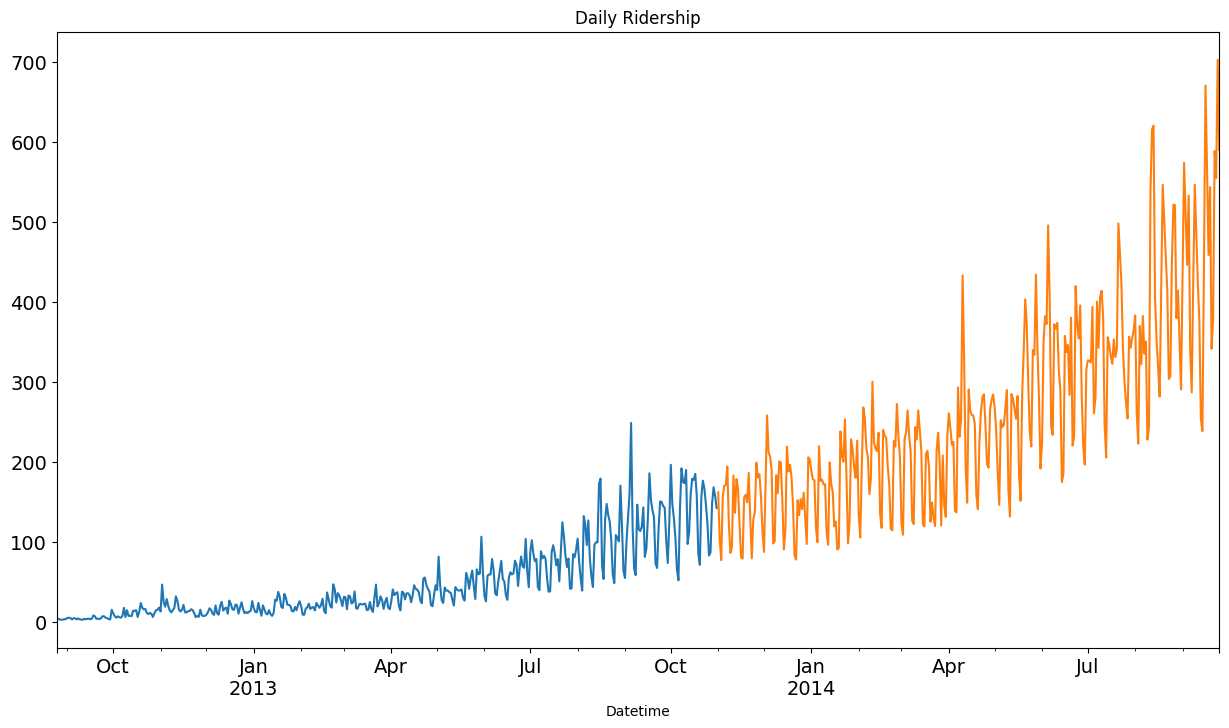

In [13]:
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

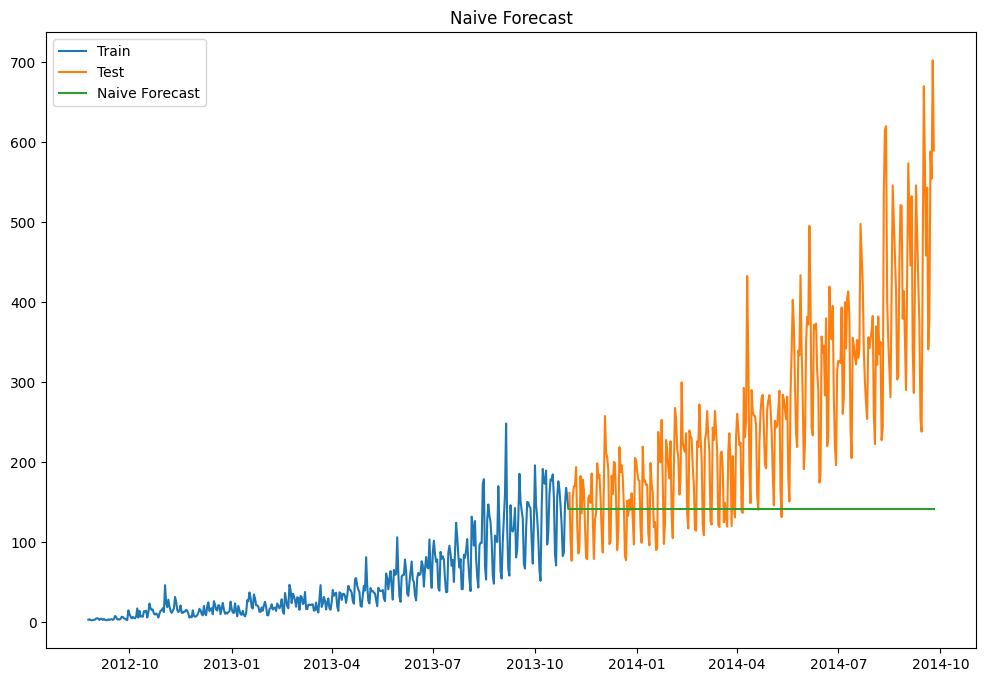

In [14]:
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rms)

168.10065982822383


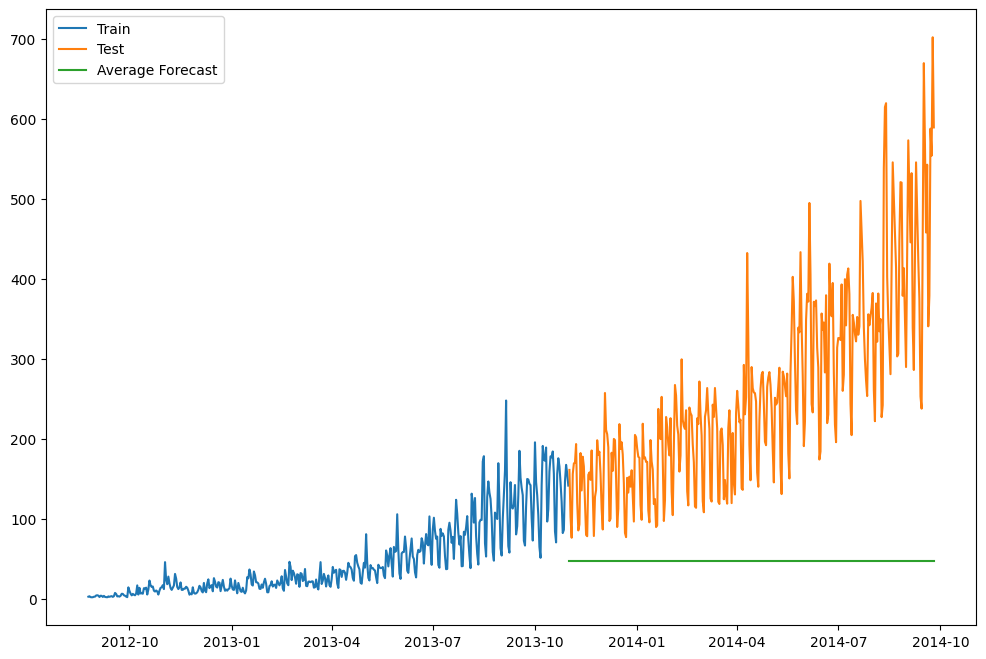

In [16]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [17]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(rms)

242.4970488095692


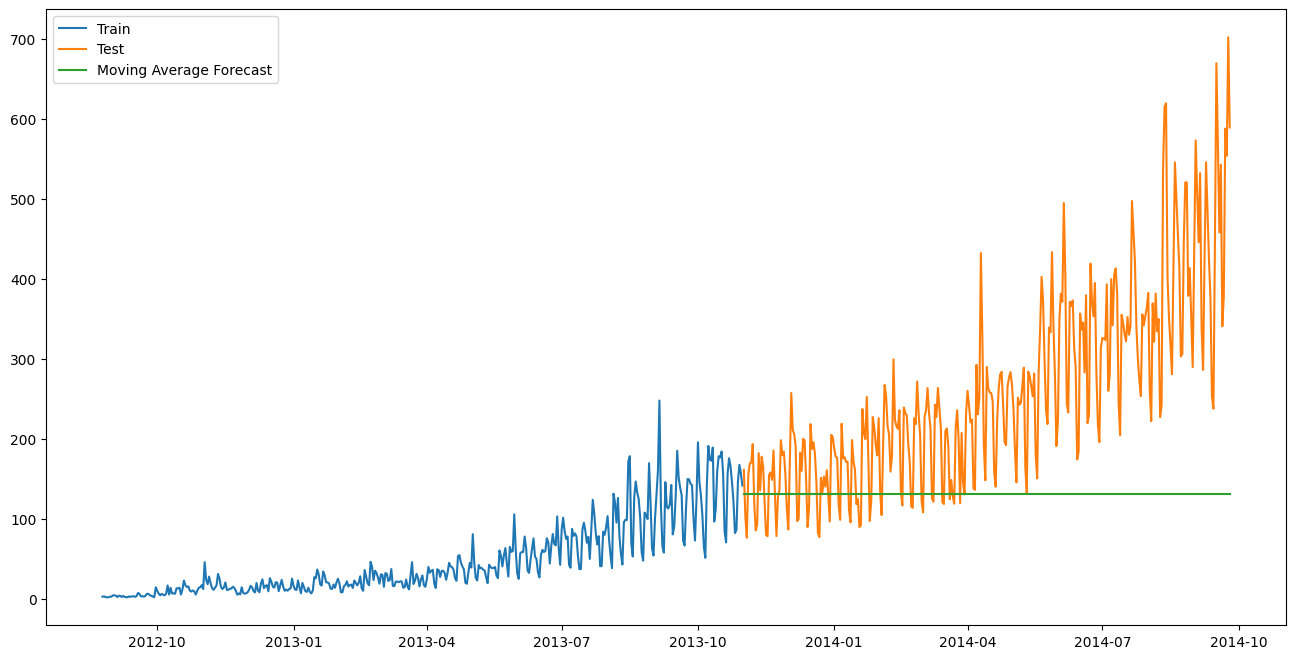

In [18]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [19]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print(rms)

175.3362295623058


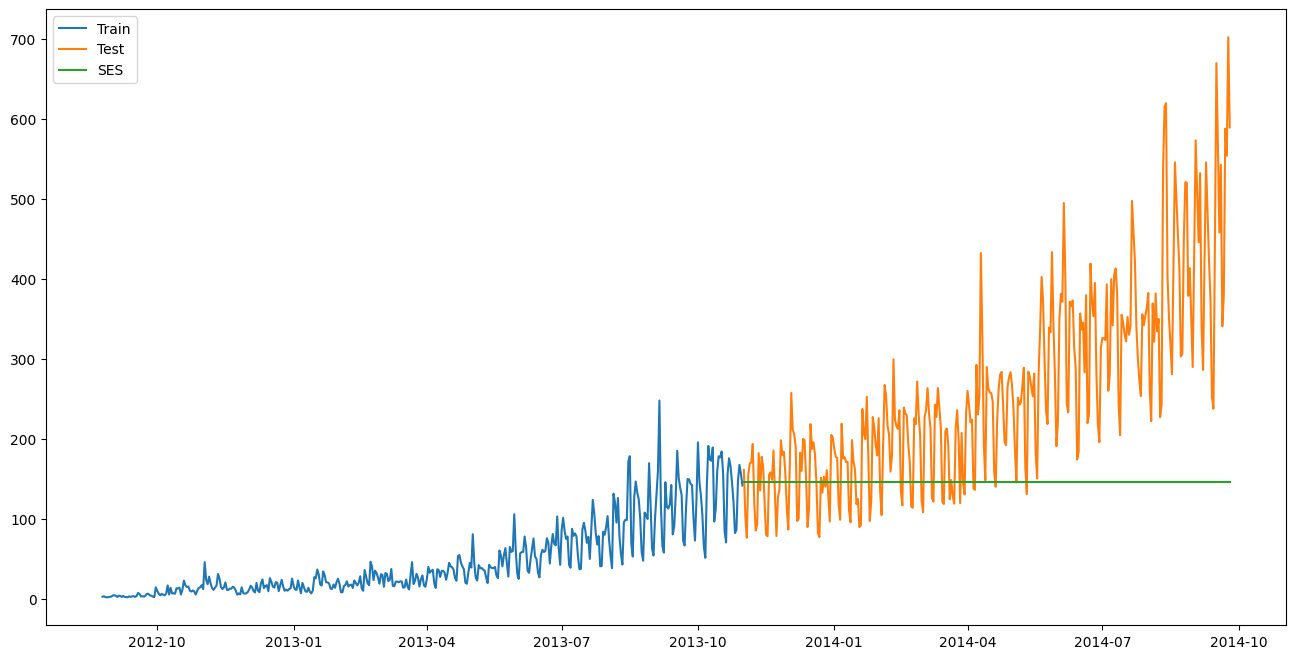

In [20]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test)) # Simple Exponential Smoothing.
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [21]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SES))
print(rms)

164.61063054927618


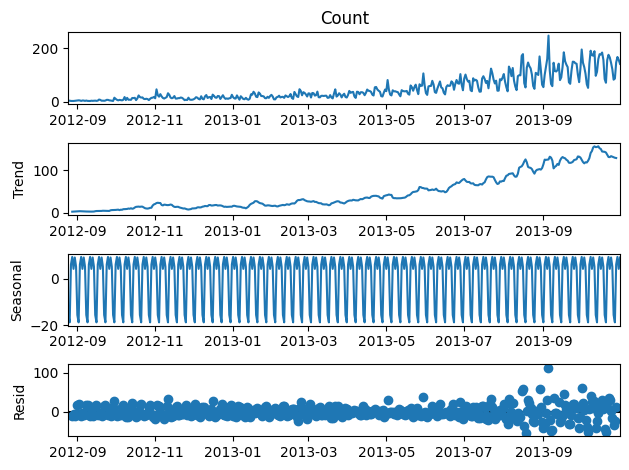

In [22]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4496\3627983870.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)


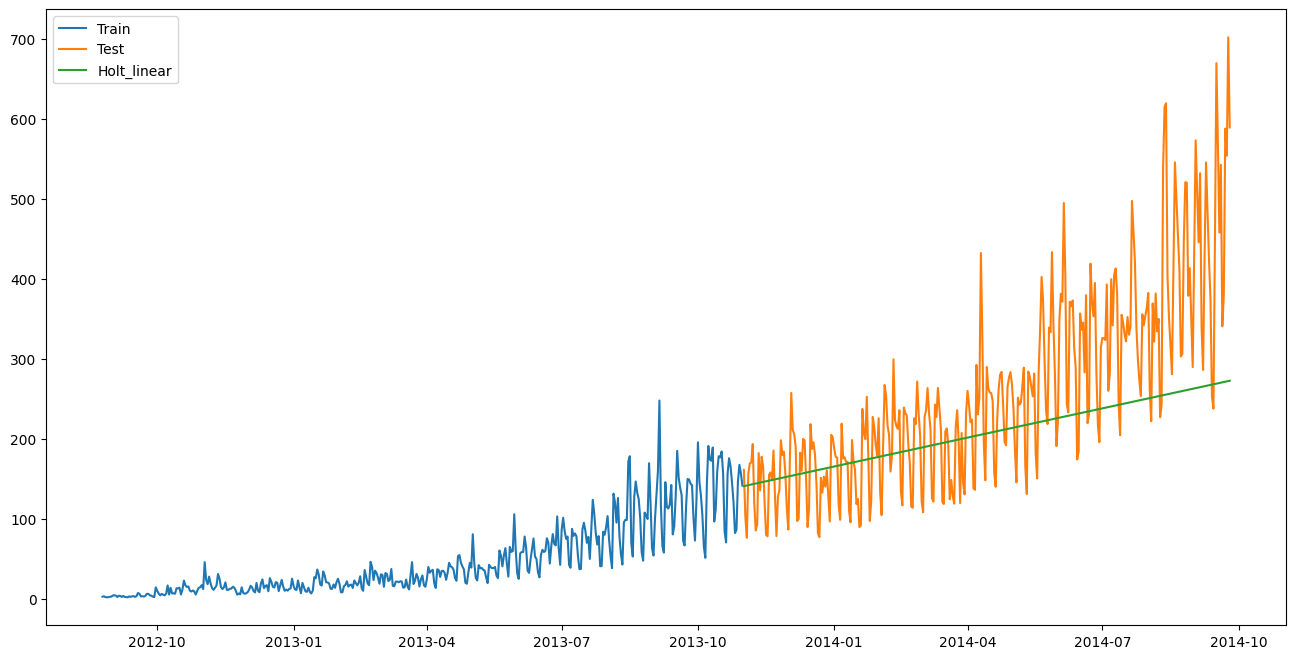

In [23]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [24]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_linear))
print(rms)

107.23394793380741


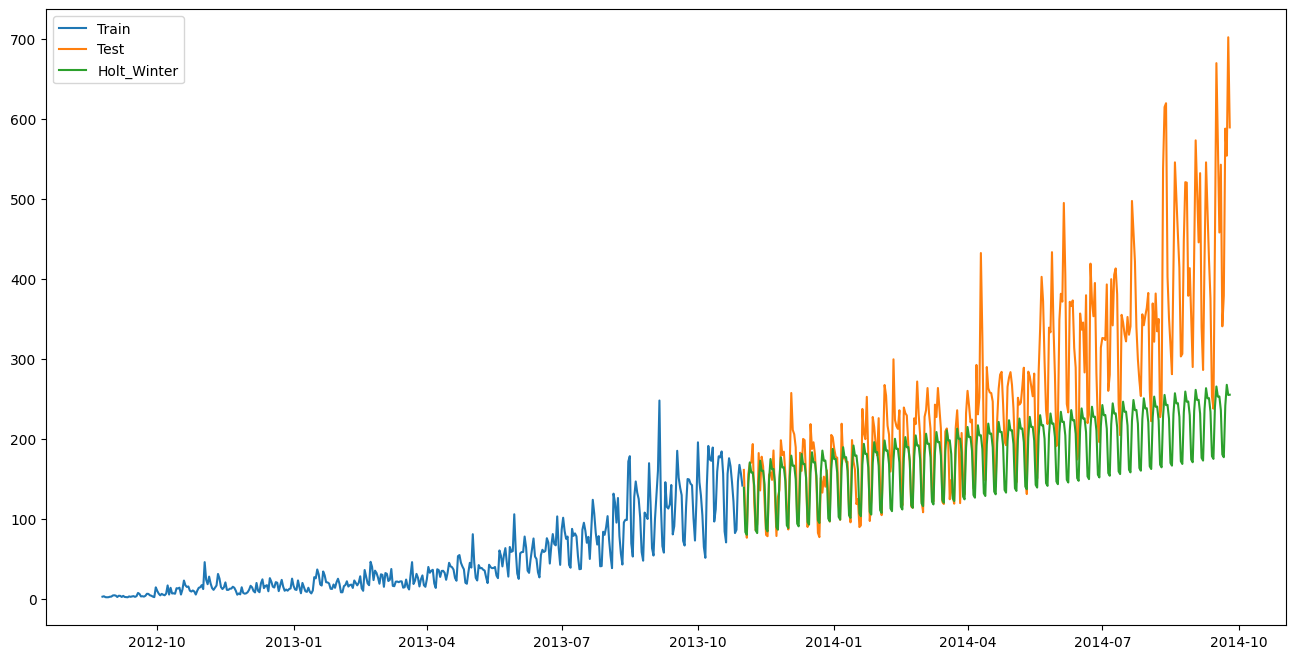

In [25]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [26]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print(rms)

115.99208184533107


In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

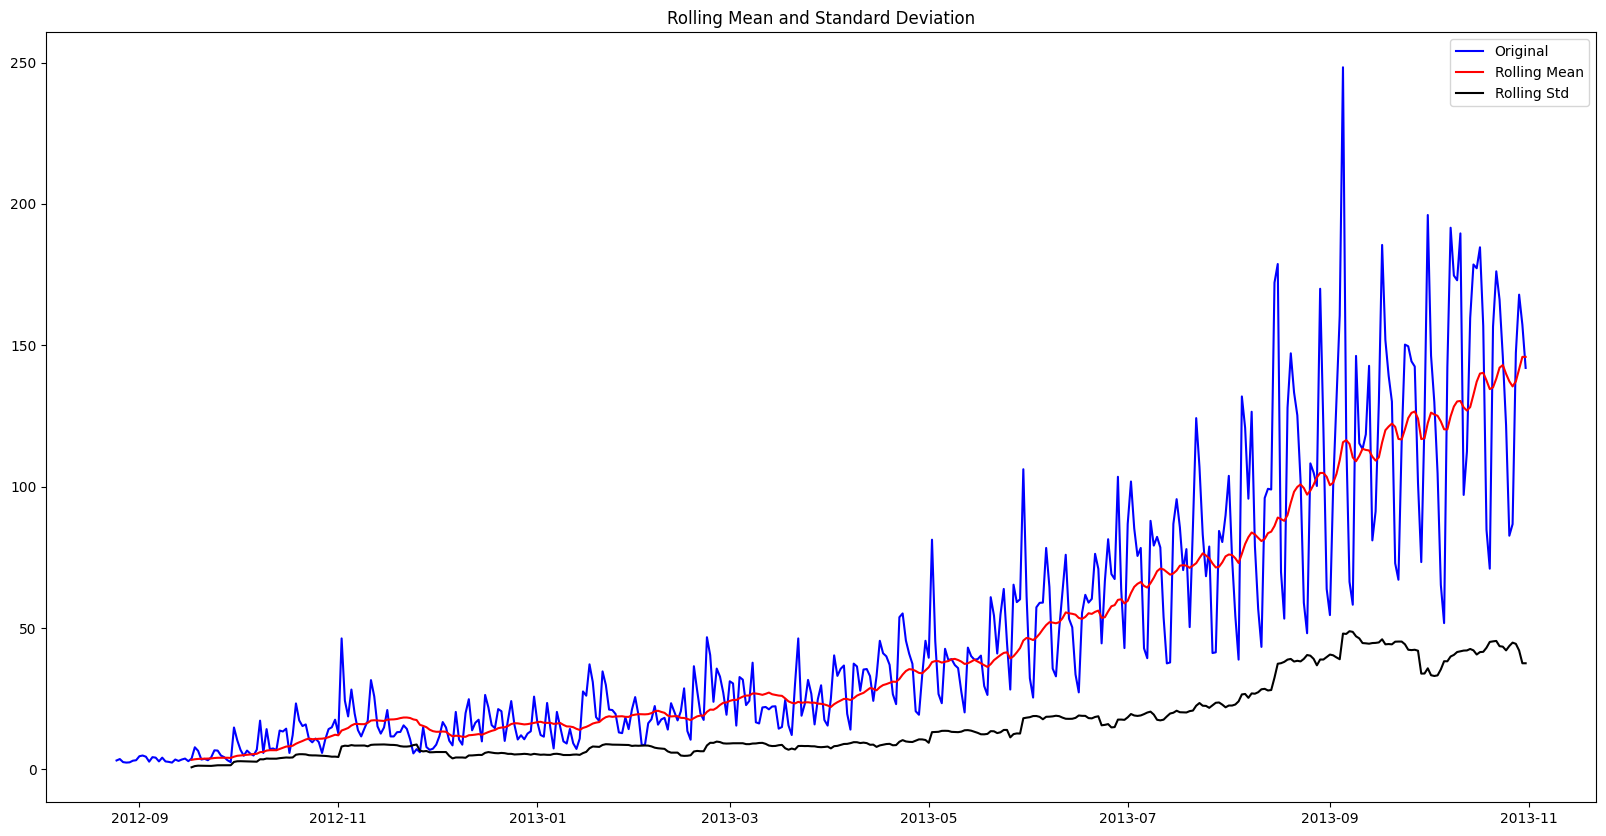

Results of Dickey Fuller test: 
Test Statistics                  0.306586
p-value                          0.977645
# Lag Used                      16.000000
Number of Observations Used    416.000000
Critical Value (1%)             -3.446168
Critical Value (5%)             -2.868513
Critical Value (10%)            -2.570484
dtype: float64


In [28]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(train['Count'])

In [29]:
Train_log = np.log(train['Count'])
valid_log = np.log(test['Count'])

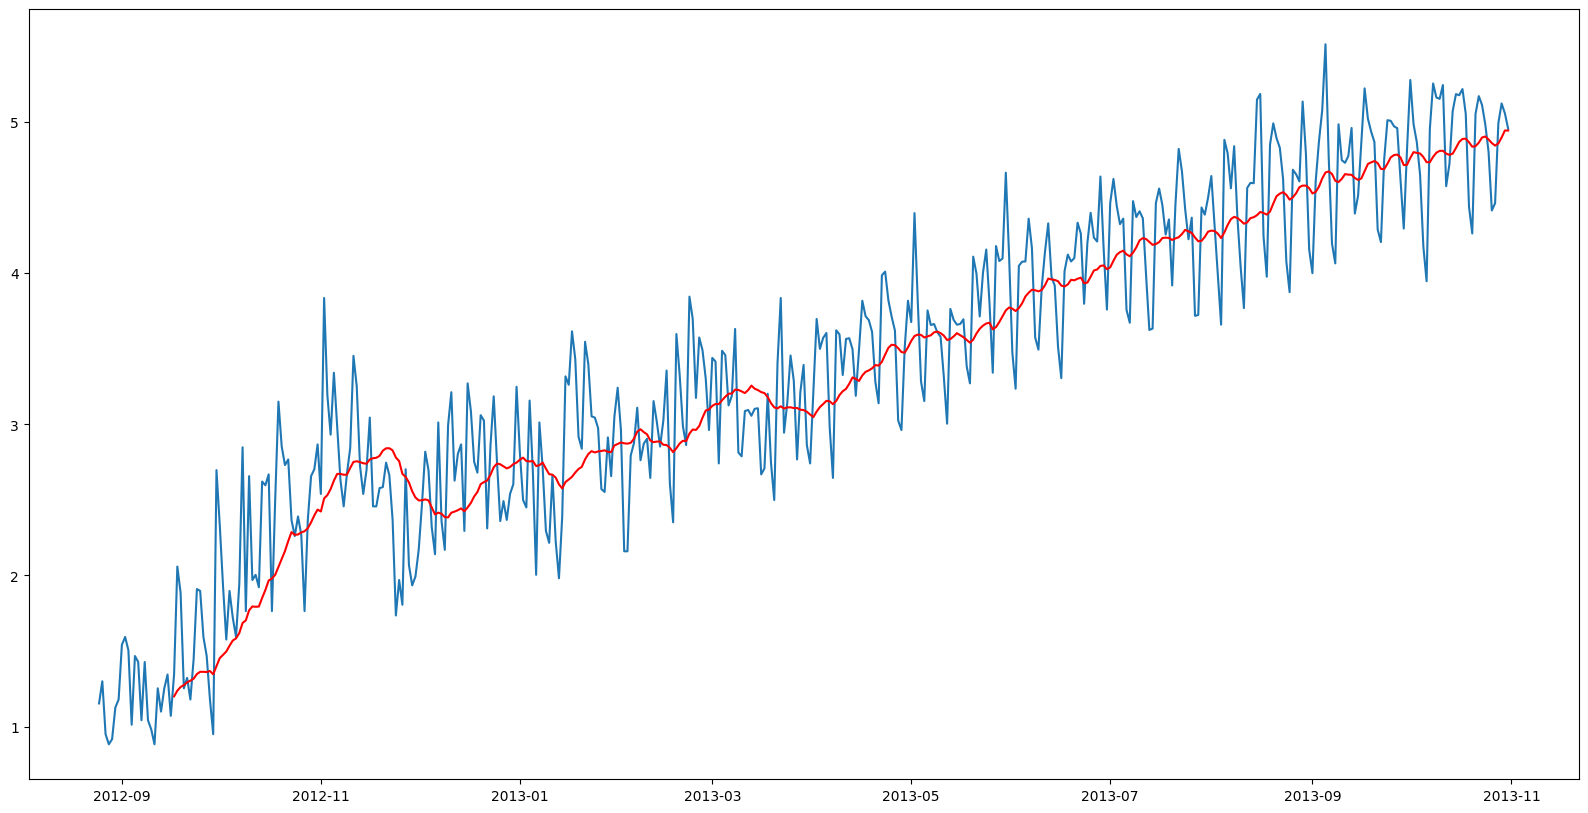

In [30]:
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')

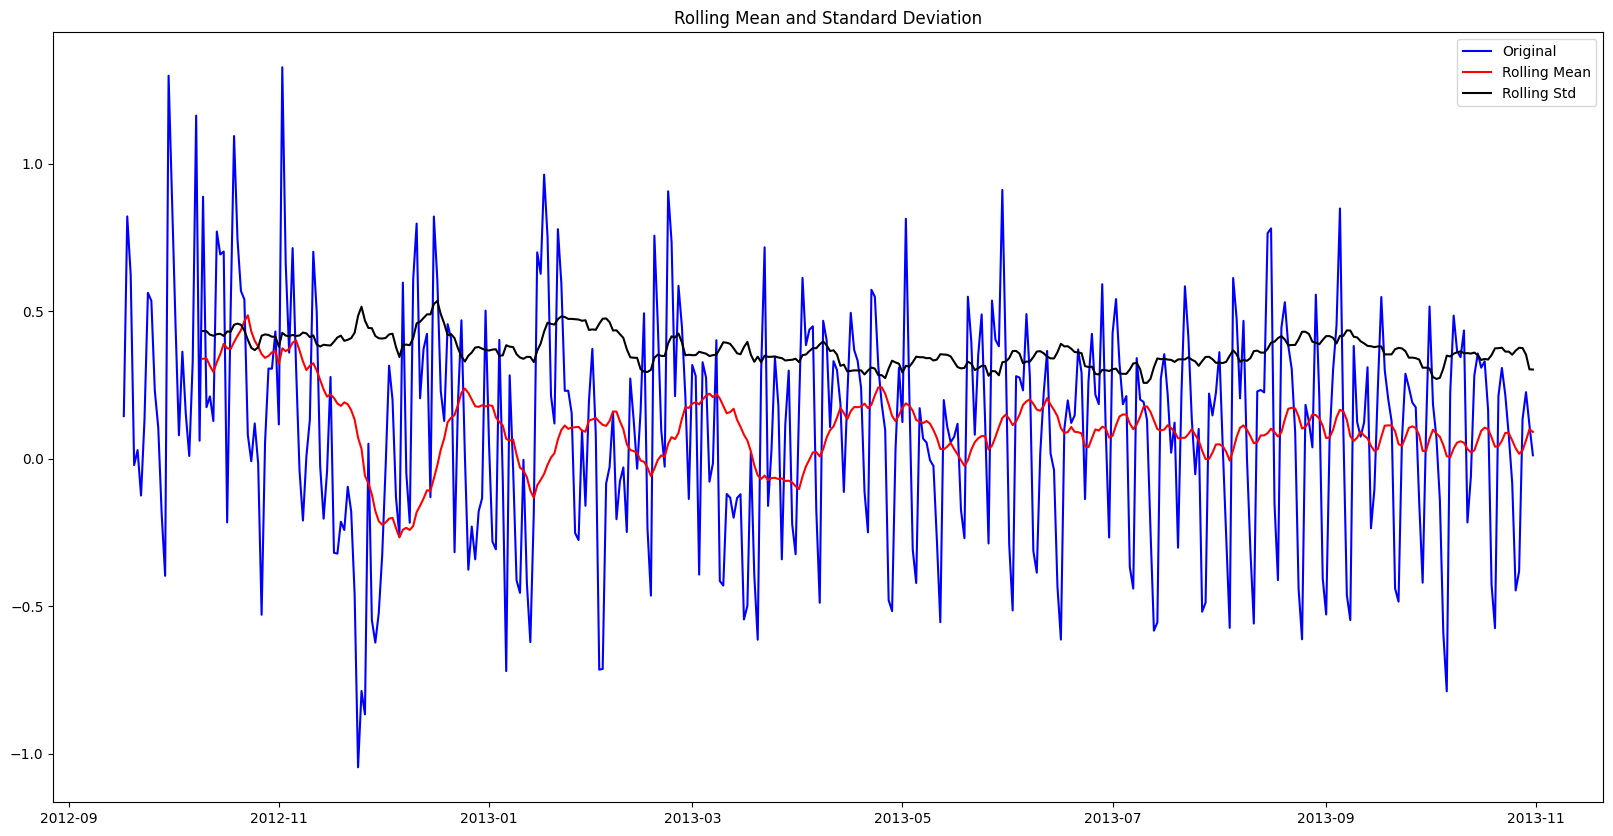

Results of Dickey Fuller test: 
Test Statistics                 -5.561408
p-value                          0.000002
# Lag Used                      16.000000
Number of Observations Used    393.000000
Critical Value (1%)             -3.447099
Critical Value (5%)             -2.868923
Critical Value (10%)            -2.570703
dtype: float64


In [31]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

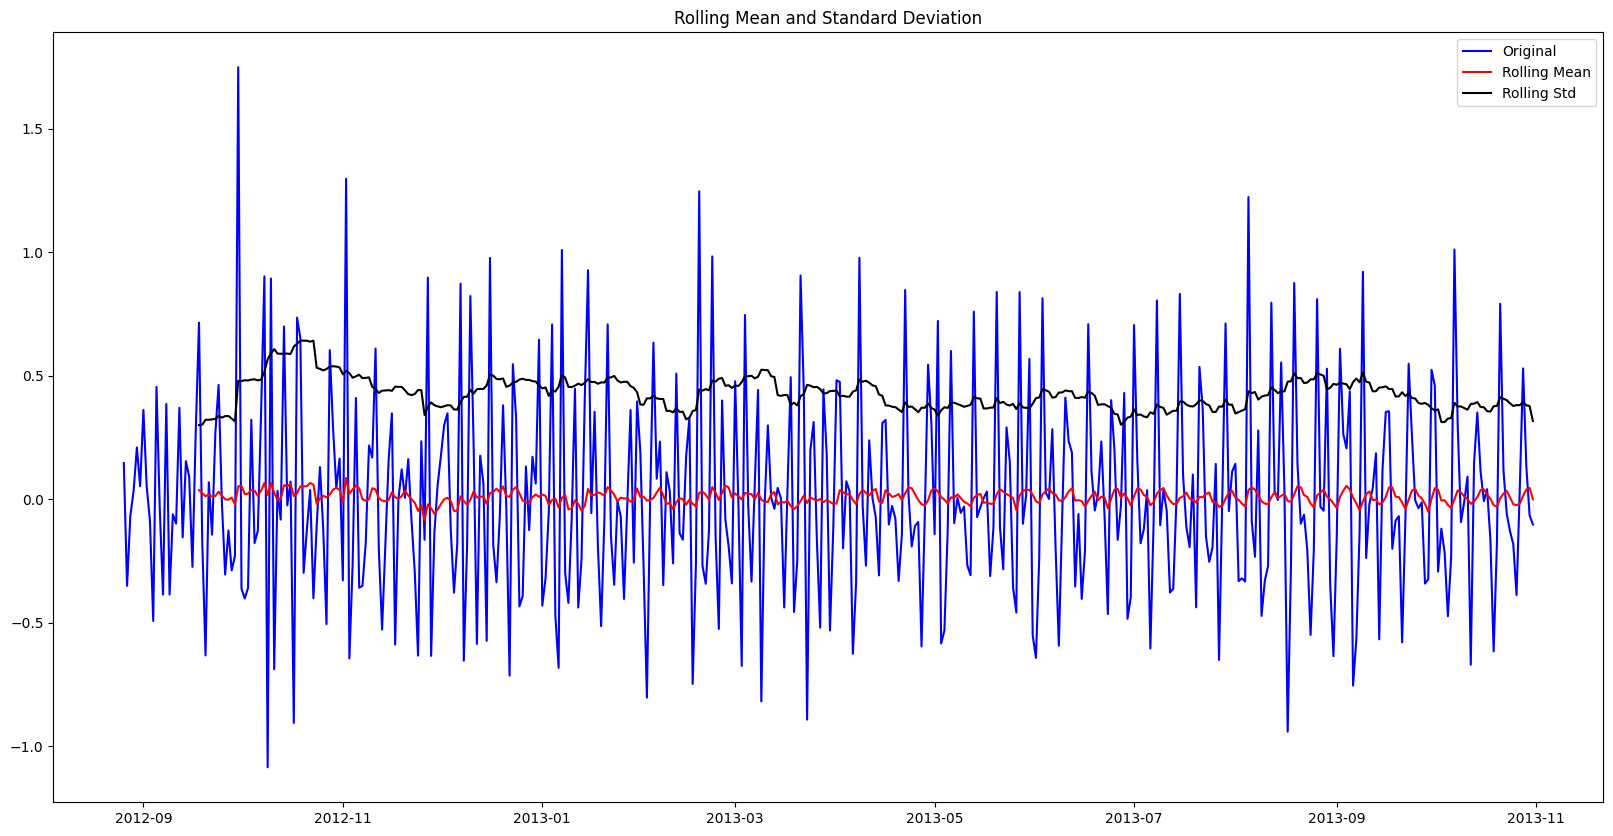

Results of Dickey Fuller test: 
Test Statistics               -7.182089e+00
p-value                        2.633764e-10
# Lag Used                     1.400000e+01
Number of Observations Used    4.170000e+02
Critical Value (1%)           -3.446129e+00
Critical Value (5%)           -2.868496e+00
Critical Value (10%)          -2.570475e+00
dtype: float64


In [32]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

### Seasonal Decompose ###

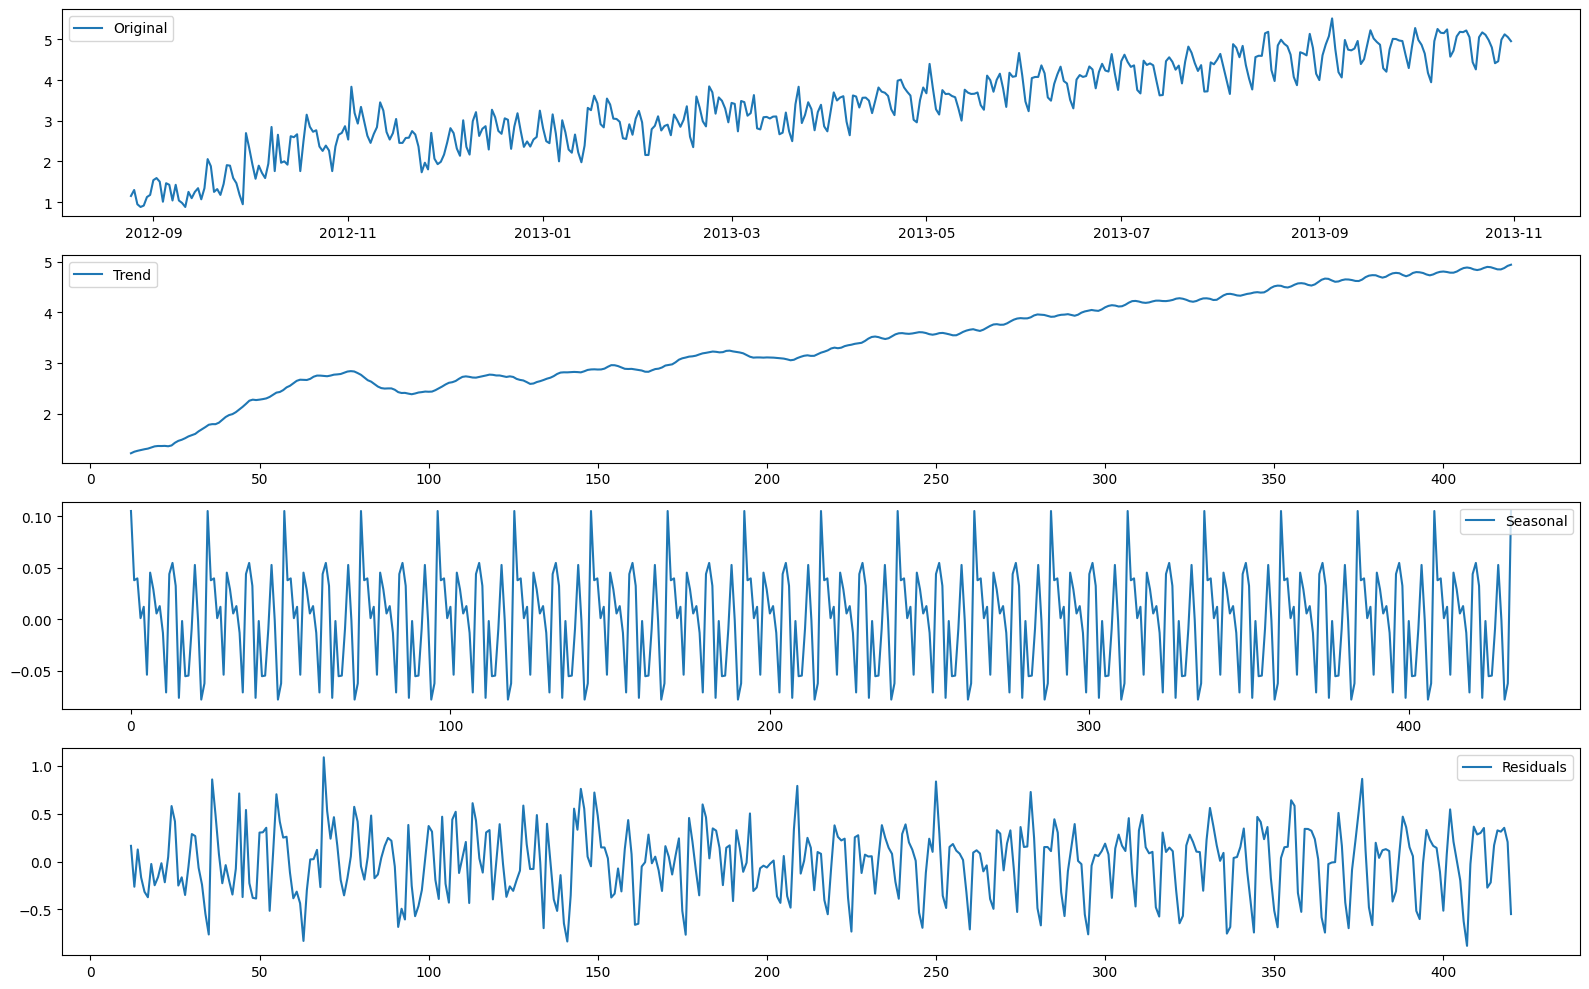

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, period = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

### Checking for stationarity of residuals ###

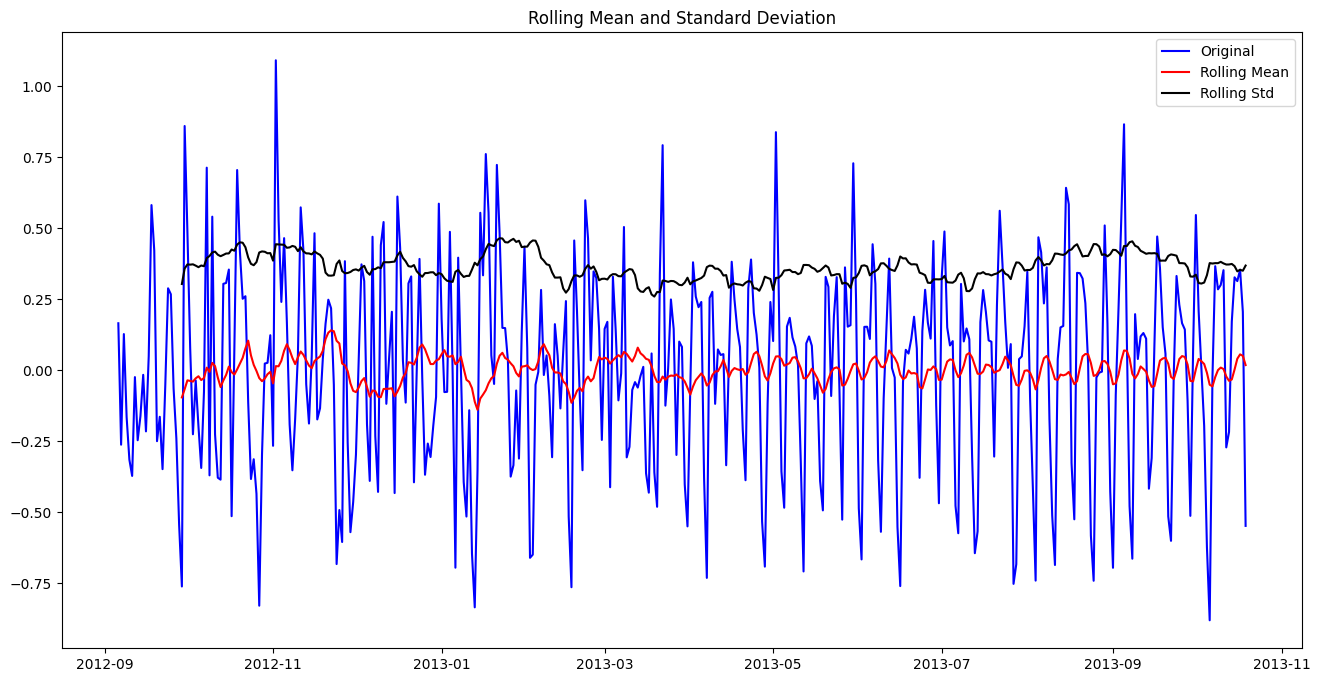

Results of Dickey Fuller test: 
Test Statistics               -6.854748e+00
p-value                        1.659424e-09
# Lag Used                     1.600000e+01
Number of Observations Used    3.920000e+02
Critical Value (1%)           -3.447142e+00
Critical Value (5%)           -2.868941e+00
Critical Value (10%)          -2.570713e+00
dtype: float64


In [34]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [35]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

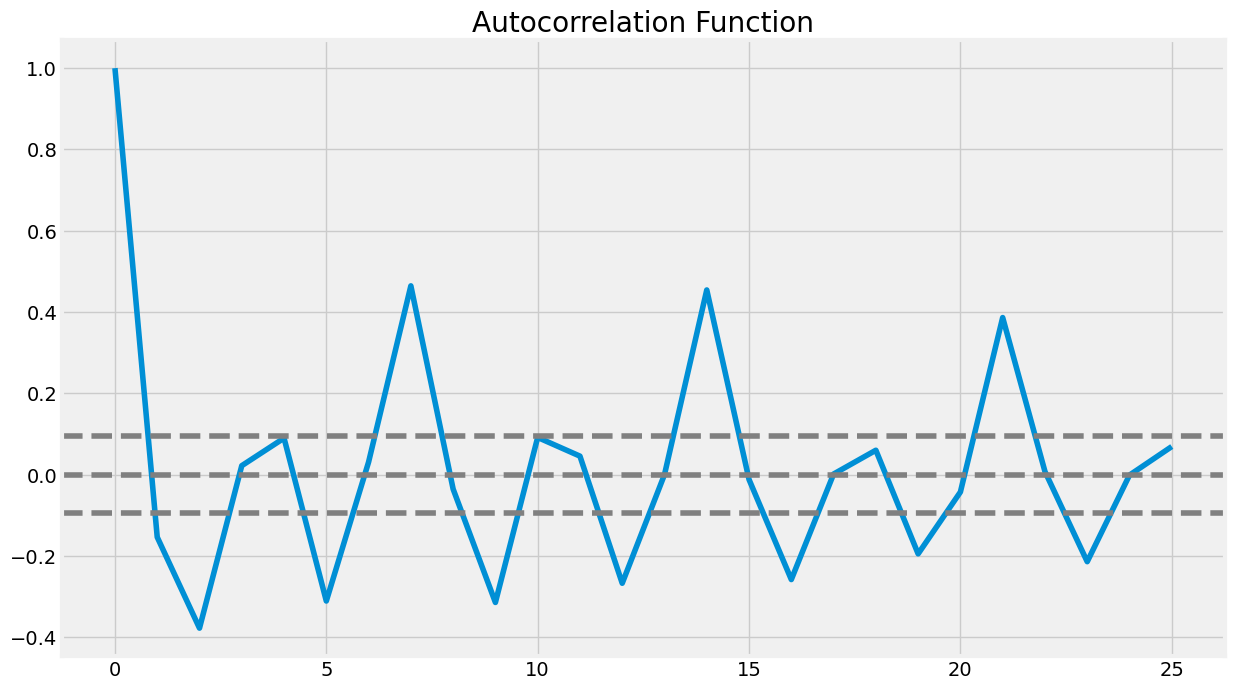

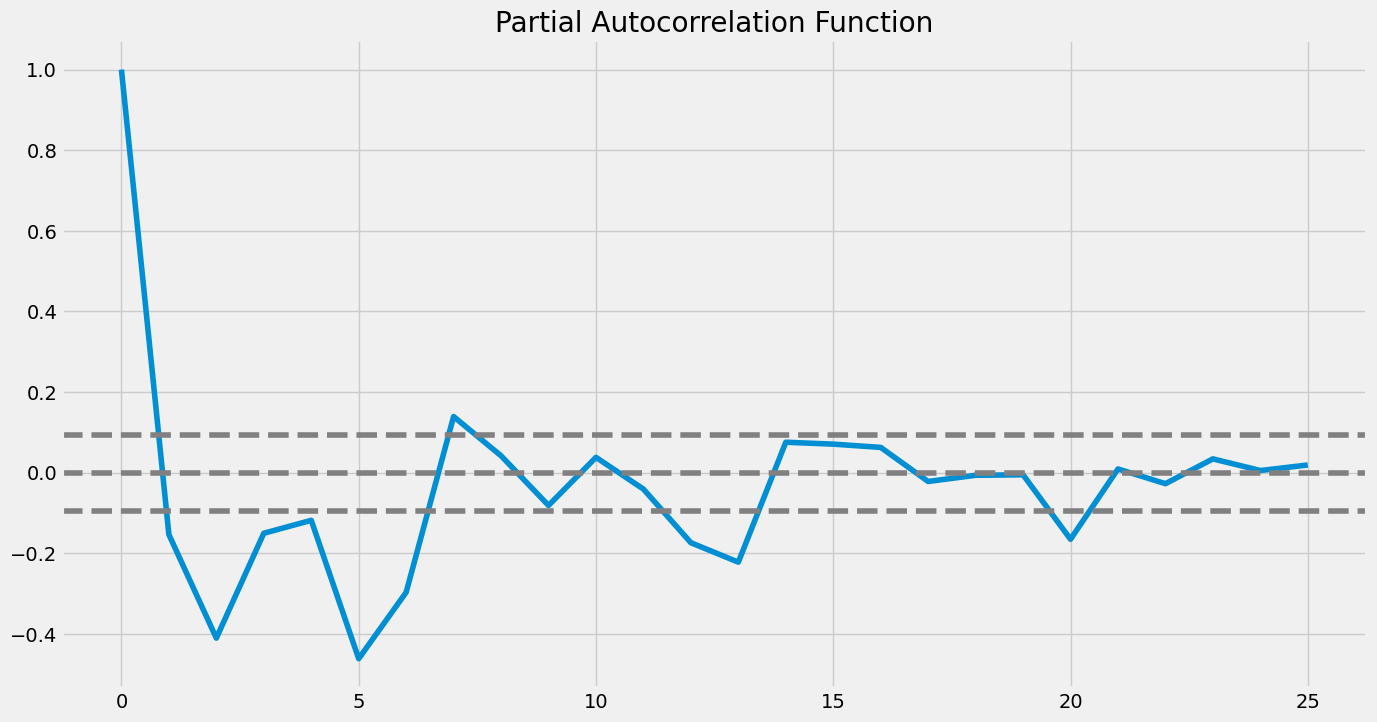

In [36]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()
# PACF
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()

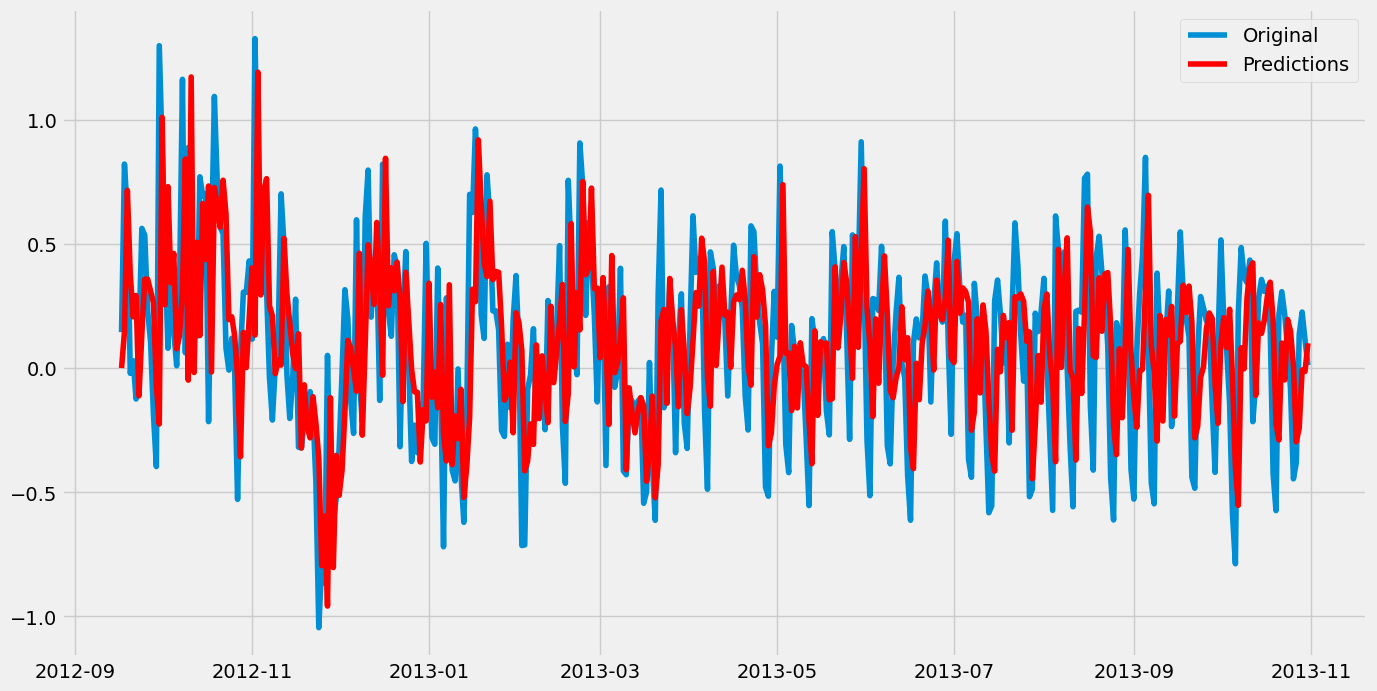

In [37]:
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(train_log_moving_diff, order = (2,1,0))  #here q value is zero since it is just AR Model
results_AR = model.fit()
plt.plot(train_log_moving_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')

In [38]:
AR_predict = results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(test.shape[0])* np.log(test['Count'])[0], index = test.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

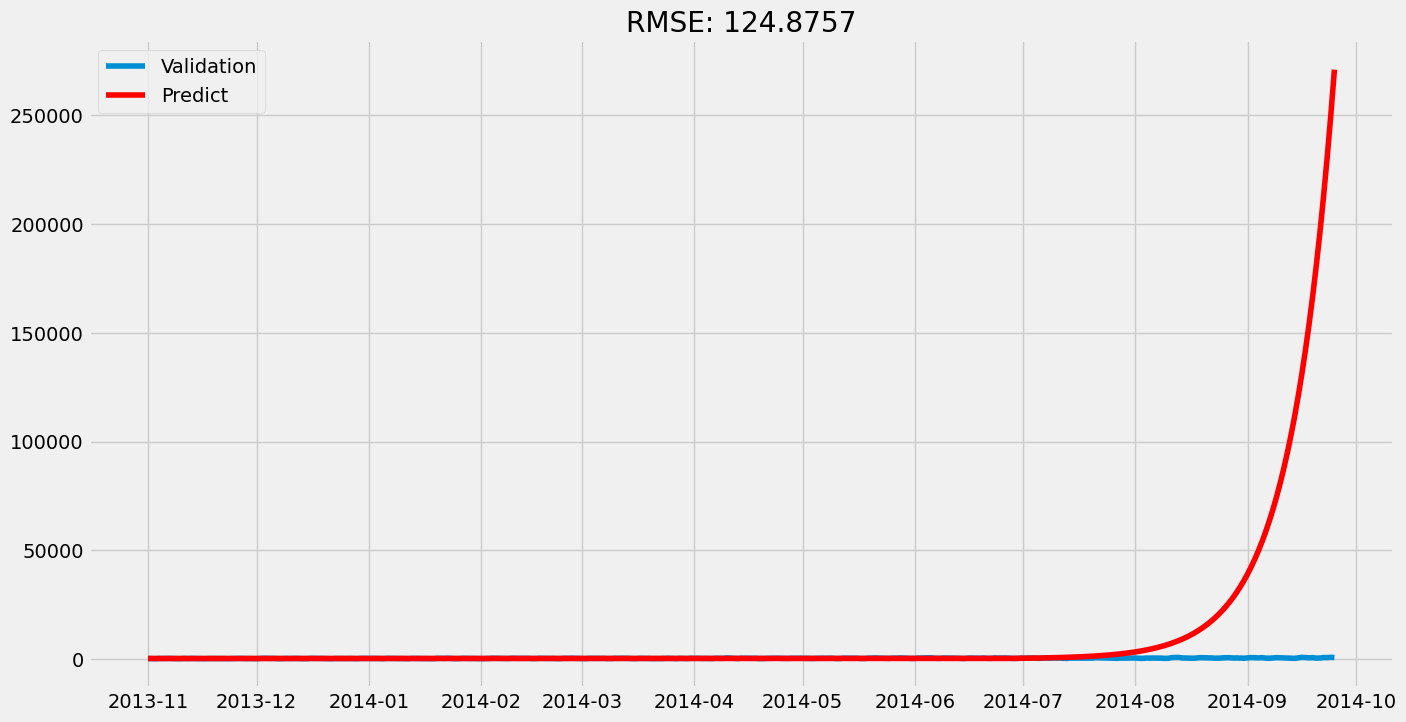

In [39]:
plt.figure(figsize = (15,8))
plt.plot(test['Count'], label = "Validation")
plt.plot(AR_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, test['Count']))/test.shape[0]))
plt.show()

### Moving average model ###

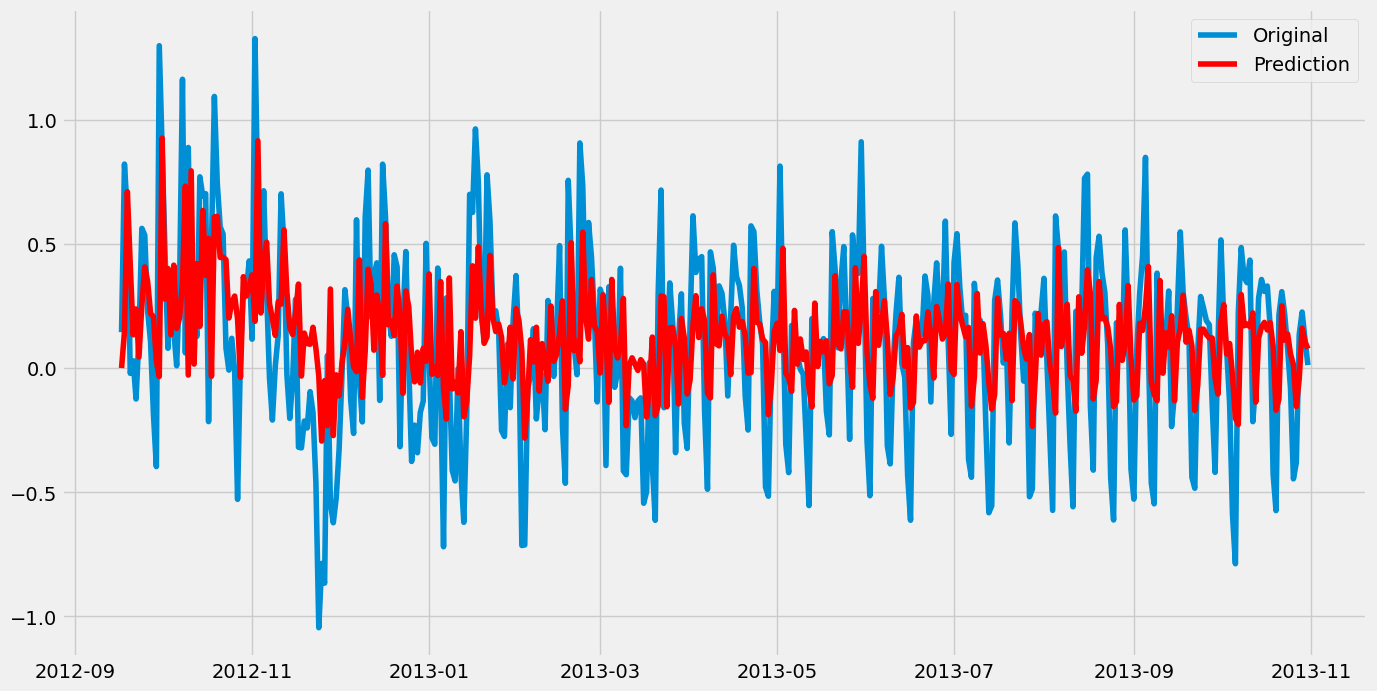

In [40]:
plt.figure(figsize = (15,8))
model = ARIMA(train_log_moving_diff, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit()
plt.plot(train_log_moving_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

In [41]:
MA_predict = results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(test.shape[0]) * np.log(test['Count'])[0], index = test.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

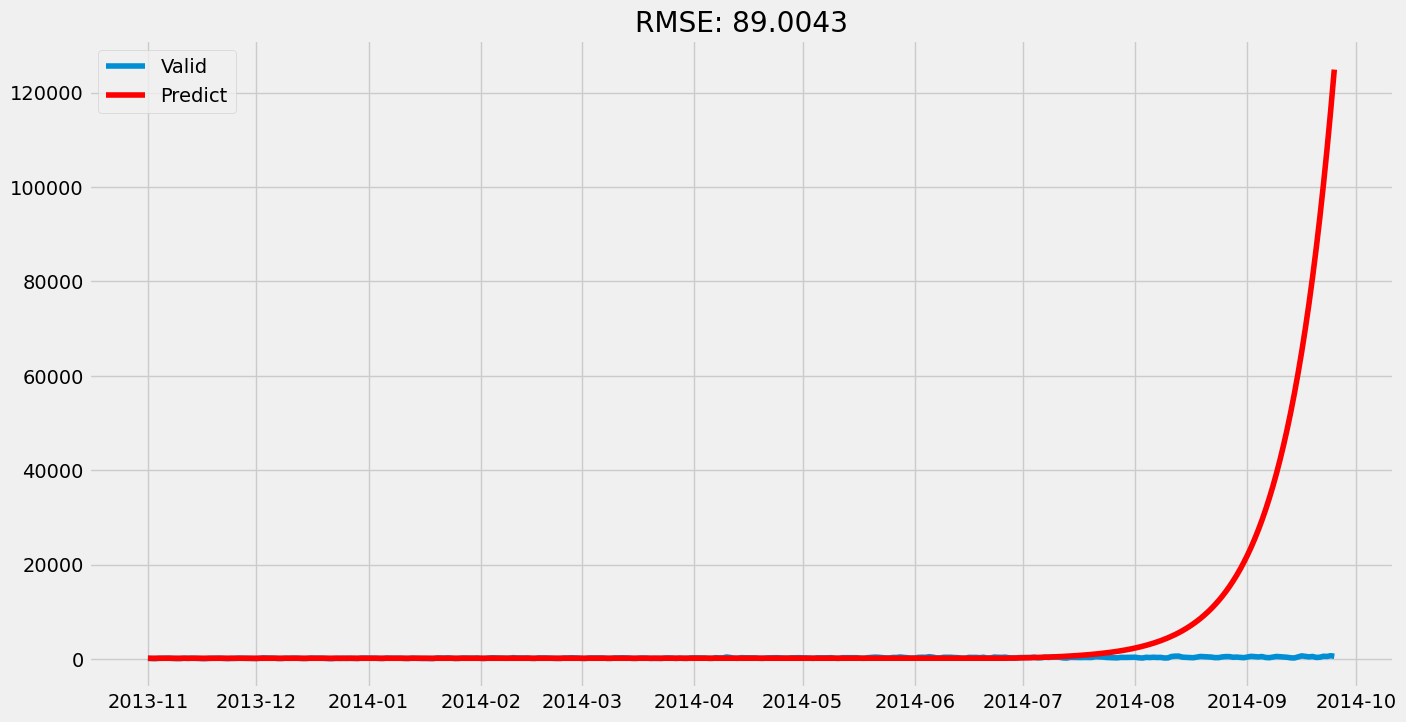

In [42]:
plt.figure(figsize = (15,8))
plt.plot(test['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, test['Count']))/test.shape[0]))
plt.show()

### Combining both ###

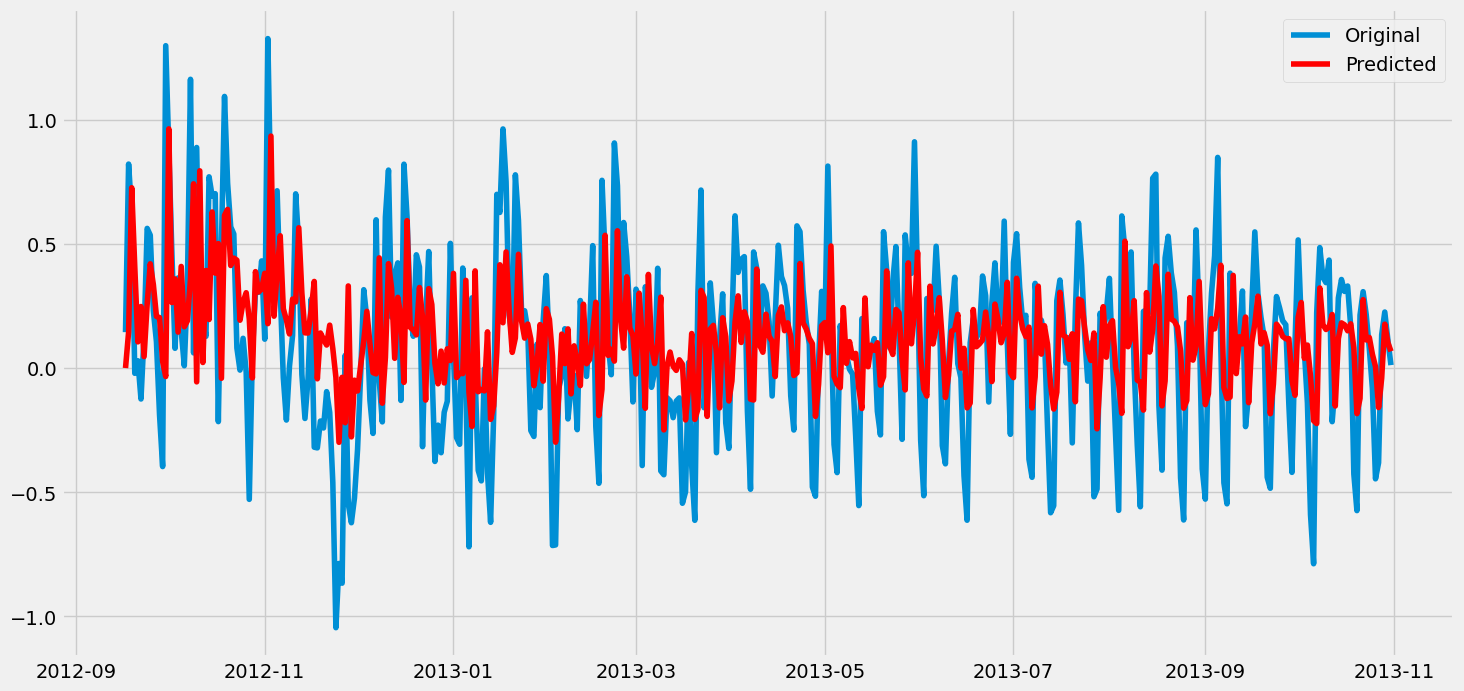

In [43]:
plt.figure(figsize = (16,8))
model = ARIMA(train_log_moving_diff, order=(2, 1, 2))  
results_ARIMA = model.fit()  
plt.plot(train_log_moving_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [44]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [45]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

NameError: name 'given_set' is not defined

In [46]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

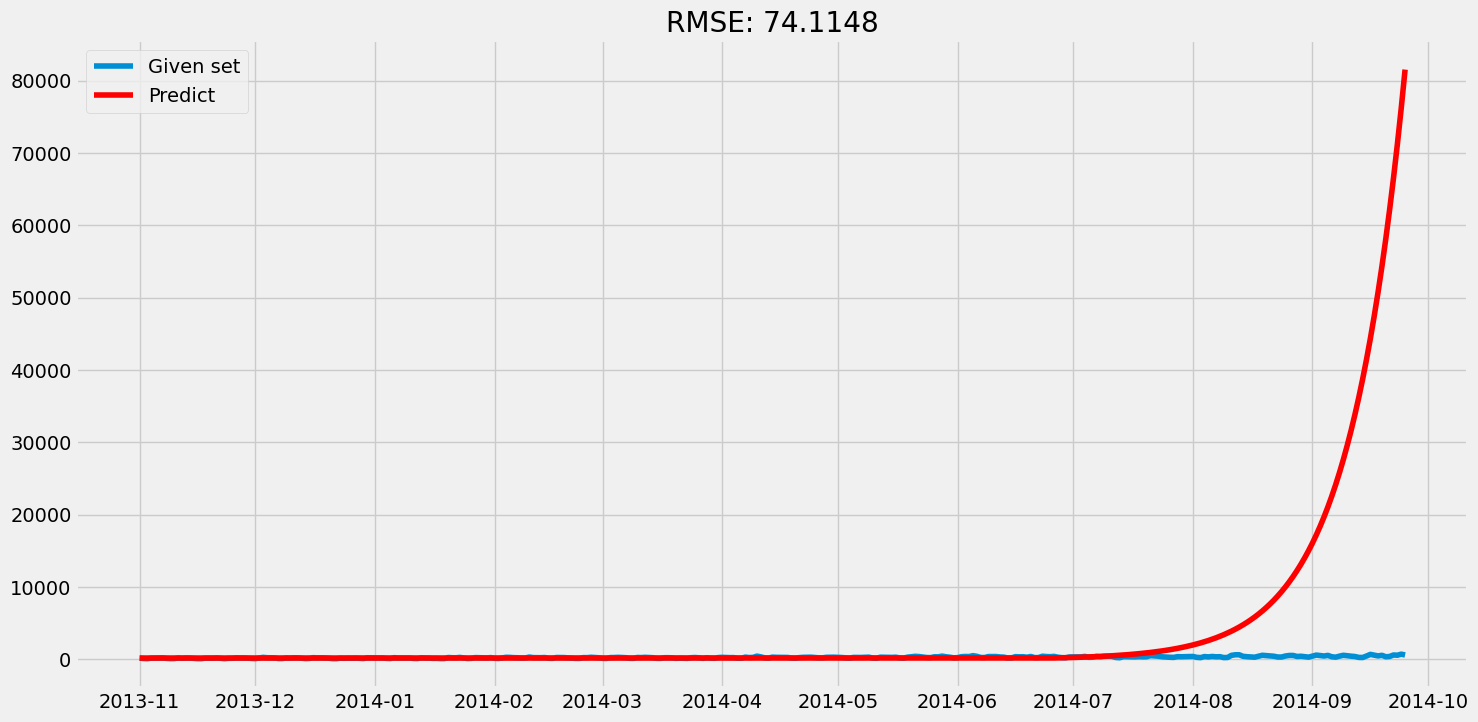

In [47]:
plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff, test)

In [53]:
test.head()

,ID,Count
Datetime,,
2013-11-01,10403.5,161.583333
2013-11-02,10427.5,103.083333
2013-11-03,10451.5,76.833333
2013-11-04,10475.5,156.416667
2013-11-05,10499.5,169.750000


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 329 entries, 2013-11-01 to 2014-09-25
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      329 non-null    float64
 1   Count   329 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


In [57]:
test=test.reset_index()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  329 non-null    datetime64[ns]
 1   ID        329 non-null    float64       
 2   Count     329 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.8 KB


In [58]:
test[(test['Datetime']>='2014-08-01')&(test['Datetime']<='2014-10-01')]

,Datetime,ID,Count
273,2014-08-01,16955.5,382.750000
274,2014-08-02,16979.5,261.583333
275,2014-08-03,17003.5,222.500000
276,2014-08-04,17027.5,369.666667
277,2014-08-05,17051.5,321.833333
278,2014-08-06,17075.5,382.083333
279,2014-08-07,17099.5,334.833333
280,2014-08-08,17123.5,350.250000
281,2014-08-09,17147.5,227.583333
282,2014-08-10,17171.5,242.583333


In [61]:
ARIMA_predict_diff=ARIMA_predict_diff.reset_index()

In [63]:
ARIMA_predict_diff.head()

,index,predicted_mean
0,2014-06-25,0.06765
1,2014-06-26,0.06765
2,2014-06-27,0.06765
3,2014-06-28,0.06765
4,2014-06-29,0.06765


In [66]:
t2=ARIMA_predict_diff[ARIMA_predict_diff['index']<='2014-08-01']
t2['predicted_mean']=np.exp(t2['predicted_mean'])
t2

C:\Users\Hp\AppData\Local\Temp\ipykernel_4496\1355858870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['predicted_mean']=np.exp(t2['predicted_mean'])


,index,predicted_mean
0,2014-06-25,1.069991
1,2014-06-26,1.069991
2,2014-06-27,1.069991
3,2014-06-28,1.069991
4,2014-06-29,1.069991
5,2014-06-30,1.069991
6,2014-07-01,1.069991
7,2014-07-02,1.069991
8,2014-07-03,1.069991
9,2014-07-04,1.069991


In [64]:
ARIMA_predict_diff[(ARIMA_predict_diff['index']>='2014-08-01')&(ARIMA_predict_diff['index']<='2014-10-01')]

,index,predicted_mean
37,2014-08-01,0.06765
38,2014-08-02,0.06765
39,2014-08-03,0.06765
40,2014-08-04,0.06765
41,2014-08-05,0.06765
42,2014-08-06,0.06765
43,2014-08-07,0.06765
44,2014-08-08,0.06765
45,2014-08-09,0.06765
46,2014-08-10,0.06765


In [48]:
import statsmodels.api as sm

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


Text(0.5, 1.0, 'SARIMAX Model')

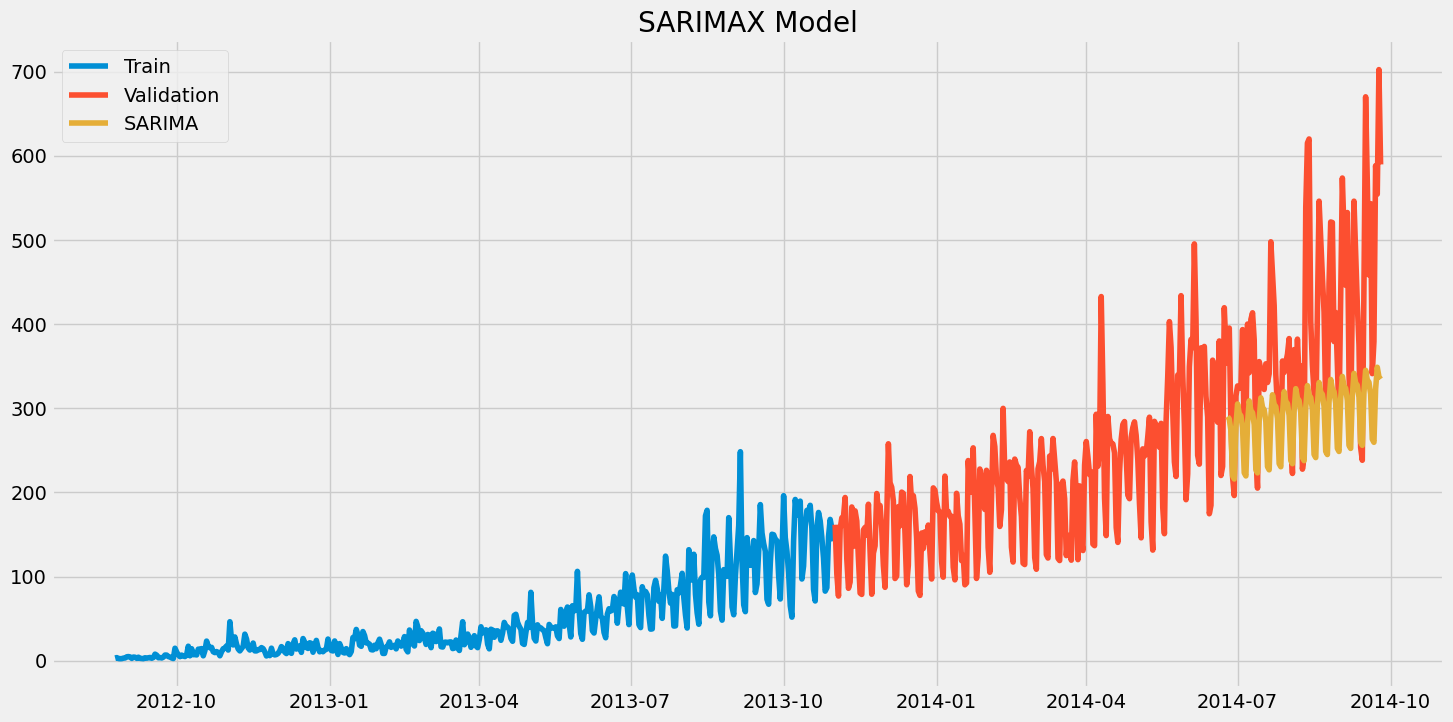

In [49]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order = (2,1,4), seasonal_order =(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label = "Train")
plt.plot(test.Count, label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [50]:
y_hat_avg.SARIMA=y_hat_avg.SARIMA.isna().replace(0)

In [51]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SARIMA))
print(rms)

284.4567059307443
